In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from MIL_functions import data_analysis,molecule_analysis
from rdkit import Chem

In [2]:
## done to hide an unneccesary error
pd.options.mode.chained_assignment = None  # default='warn'

# Aromatic Amine data analysis

In [3]:
int_results_raw = {
    'SEC':      pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_SEC.pk1'),
    'LHS' :     pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_LSH.pk1'),
    'scaffold': pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_Scaffold.pk1'),
    'random':   pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_results.pk1'),
}
ext_results_raw = {
    'SEC':      pd.read_pickle('model_results\external\ext_val_results_SEC_stratified.pk1'),
    'LHS':      pd.read_pickle('model_results\external\ext_val_results_LSH_stratified.pk1'),
    'scaffold': pd.read_pickle('model_results\external\ext_val_results_scaffold_stratified.pk1'),
    'random':   pd.read_pickle('model_results\external\ext_val_results.pk1')
}
macro_results={}; micro_results={}; int_results={}; ext_results={}

for data in int_results_raw:
    int_results[data] = data_analysis.pickle_transform(int_results_raw[data])
    macro_results[data],micro_results[data] = data_analysis.macro_mirco_mean_stdv(int_results[data])
macro_results = data_analysis.get_AUROC(data_dict=int_results_raw, paste_dict=macro_results)
micro_results = data_analysis.get_AUROC(data_dict=int_results_raw, paste_dict=micro_results)

for data in ext_results_raw:
    ext_results_raw[data]['model'] = ext_results_raw[data]['model'].apply(lambda x:x.replace('total_data_',''))
    ext_results[data] = data_analysis.pickle_transform(ext_results_raw[data])
    ext_results[data] = data_analysis.ext_val_metrics(ext_results[data])
ext_results = data_analysis.get_AUROC(data_dict=ext_results_raw, paste_dict=ext_results)

SEC
LHS
scaffold
random
SEC
LHS
scaffold
random
SEC
LHS
scaffold
random


Results info

###### MACCS

In [4]:
micro_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.349495,0.058106,0.080489,0.446418,0.910526,0.355822,0.80652
1,MACCS,SIL_linear,0.868971,0.239470,0.752038,0.802292,0.798325,0.820513,0.81919
2,MACCS,NSK_linear,0.865377,0.278661,0.732060,0.812607,0.855167,0.711240,0.82846
3,MACCS,sbMIL-linear,0.212877,0.038667,0.049967,0.393983,0.996516,0.339994,0.58388
4,MACCS,sMIL_linear,0.777377,0.111704,0.562617,0.681948,0.749420,0.488938,0.66271
5,MACCS,MISVM_quadratic,0.868763,0.292770,0.736934,0.820630,0.874262,0.707143,0.83973
6,MACCS,SIL_quadratic,0.883648,0.282893,0.775481,0.828940,0.830099,0.824769,0.82655
7,MACCS,NSK_quadratic,0.845192,0.243239,0.692421,0.783668,0.832055,0.665350,0.76765
8,MACCS,sbMIL-quadratic,0.296664,0.058201,0.083517,0.432092,1.000000,0.354818,0.65608
9,MACCS,sMIL_quadratic,0.808230,0.112867,0.638887,0.708883,0.738785,0.562500,0.71322


In [5]:
micro_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.586895,0.134457,0.271252,0.584527,0.927928,0.424370,0.82534
1,MACCS,SIL_linear,0.852378,0.204945,0.721110,0.776791,0.781717,0.753670,0.83386
2,MACCS,NSK_linear,0.882413,0.305332,0.766287,0.835817,0.869389,0.754179,0.85458
3,MACCS,sbMIL-linear,0.200599,0.035228,0.043932,0.387966,0.985294,0.337477,0.60058
4,MACCS,sMIL_linear,0.813218,0.070555,0.664207,0.702006,0.714646,0.577640,0.65265
5,MACCS,MISVM_quadratic,0.886177,0.321662,0.771567,0.844986,0.895028,0.741425,0.86521
6,MACCS,SIL_quadratic,0.881383,0.288550,0.768226,0.828940,0.842385,0.787631,0.85701
7,MACCS,NSK_quadratic,0.860807,0.273554,0.722408,0.807163,0.854620,0.697630,0.79807
8,MACCS,sbMIL-quadratic,0.280268,0.044351,0.054248,0.415759,0.916859,0.344782,0.68887
9,MACCS,sMIL_quadratic,0.813611,0.125156,0.648580,0.717479,0.744637,0.586667,0.71655


In [6]:
micro_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.598276,0.129619,0.272918,0.585960,0.898914,0.422590,0.78577
1,MACCS,SIL_linear,0.832074,0.139790,0.690318,0.738968,0.746116,0.692473,0.78674
2,MACCS,NSK_linear,0.872638,0.289633,0.746741,0.822350,0.860616,0.729941,0.82532
3,MACCS,sbMIL-linear,0.237660,0.041608,0.053040,0.402579,0.970149,0.342314,0.63485
4,MACCS,sMIL_linear,0.814238,0.055965,0.670956,0.699427,0.708038,0.584362,0.65695
5,MACCS,MISVM_quadratic,0.870006,0.298366,0.738733,0.823782,0.882883,0.704918,0.84039
6,MACCS,SIL_quadratic,0.870866,0.264713,0.749141,0.812034,0.825373,0.767901,0.82057
7,MACCS,NSK_quadratic,0.852012,0.258138,0.705123,0.794556,0.844172,0.678469,0.78652
8,MACCS,sbMIL-quadratic,0.278805,0.048401,0.063415,0.418911,0.951456,0.347628,0.65765
9,MACCS,sMIL_quadratic,0.806786,0.108655,0.636570,0.706304,0.736661,0.555556,0.69550


In [7]:
micro_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,MISVM_linear,0.520231,0.094371,0.186458,0.522989,0.900000,0.370968,0.79157
1,MACCS,SIL_linear,0.866322,0.207316,0.748726,0.791954,0.793640,0.782443,0.83436
2,MACCS,NSK_linear,0.887019,0.300322,0.775512,0.837931,0.874408,0.740506,0.84703
3,MACCS,sbMIL-linear,0.240741,0.039724,0.051939,0.387356,0.971264,0.322478,0.60675
4,MACCS,sMIL_linear,0.825653,0.054377,0.688508,0.714080,0.725593,0.553648,0.65425
5,MACCS,MISVM_quadratic,0.876746,0.295024,0.752477,0.827586,0.886213,0.695896,0.85239
6,MACCS,SIL_quadratic,0.875605,0.259902,0.757709,0.815230,0.835364,0.744488,0.85309
7,MACCS,NSK_quadratic,0.855519,0.252564,0.711235,0.795402,0.854133,0.652174,0.78603
8,MACCS,sbMIL-quadratic,0.329268,0.061251,0.092478,0.431034,0.987805,0.339357,0.72509
9,MACCS,sMIL_quadratic,0.837406,0.138969,0.695699,0.745690,0.763996,0.635815,0.74524


In [8]:
ext_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.705882,0.151163,0.411765,0.651163,0.837209,0.465116,0.78562
1,MACCS,TPOT,0.821429,0.245411,0.638352,0.767442,0.867925,0.606061,0.77746
2,MACCS,NSK_polynomial,0.803030,0.146866,0.622105,0.714286,0.746479,0.600000,0.60710


In [9]:
ext_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.796748,0.144746,0.601409,0.709302,0.765625,0.545455,0.61896
1,MACCS,TPOT,0.812500,0.139916,0.641915,0.720930,0.753623,0.588235,0.65788
2,MACCS,NSK_polynomial,0.721311,0.077322,0.442623,0.626374,0.721311,0.433333,0.54098


In [10]:
ext_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK_linear,0.684685,0.058651,0.360934,0.593023,0.730769,0.382353,0.55712
1,MACCS,TPOT,0.826446,0.207767,0.656654,0.755814,0.806452,0.625000,0.60954
2,MACCS,NSK_polynomial,0.596491,-0.035568,0.183538,0.494505,0.641509,0.289474,0.38306


In [11]:
ext_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,TPOT,0.866142,0.253253,0.737626,0.804598,0.833333,0.714286,0.82030
1,MACCS,NSK_linear,0.875000,0.265024,0.756174,0.816092,0.835821,0.750000,0.81274
2,MACCS,NSK_polynomial,0.866142,0.284692,0.736789,0.815217,0.833333,0.769231,0.76335


Results graphics

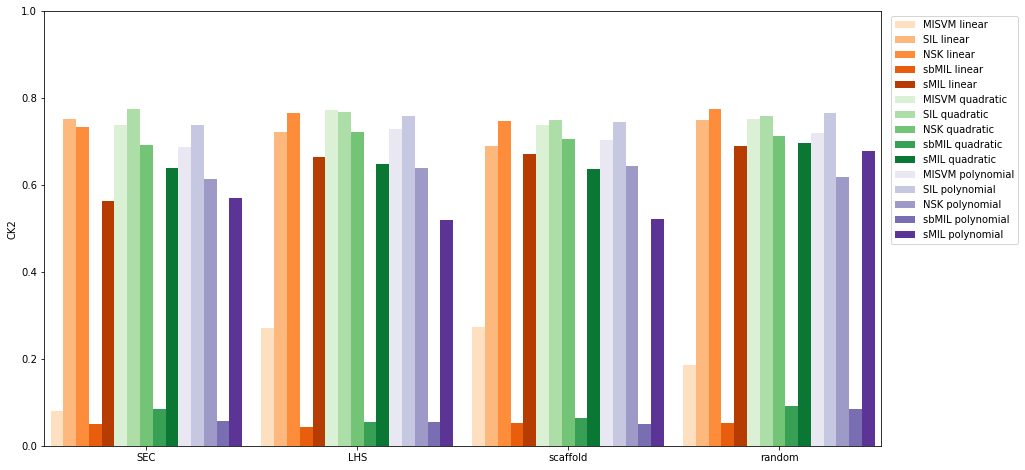

In [12]:
data_analysis.my_grouped_bar(micro_results,metric='CK2')

### Internal Validation

Bar Charts

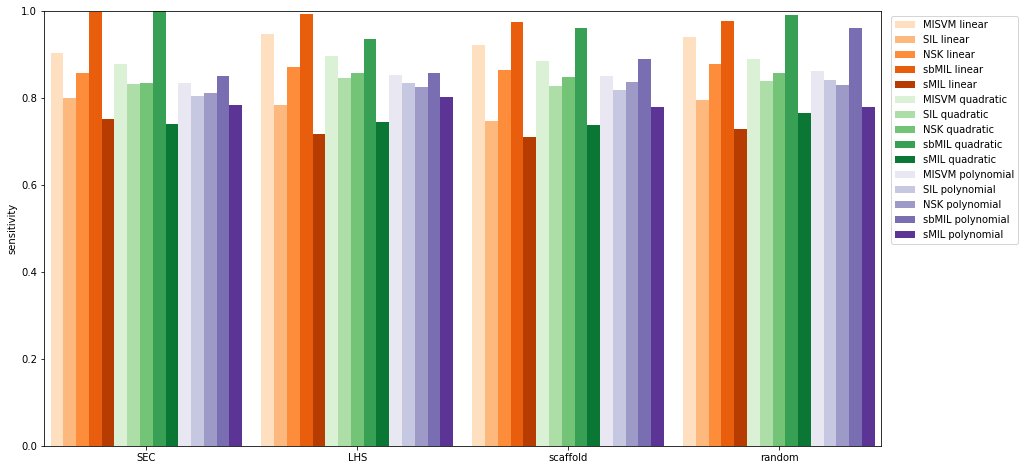

In [13]:
data_analysis.my_grouped_bar(macro_results,metric='sensitivity')

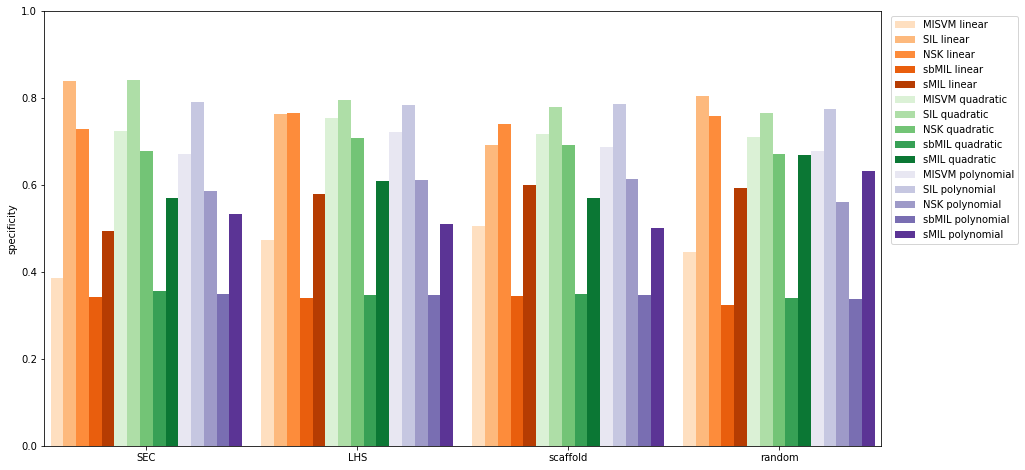

In [14]:
data_analysis.my_grouped_bar(macro_results,metric='specificity')

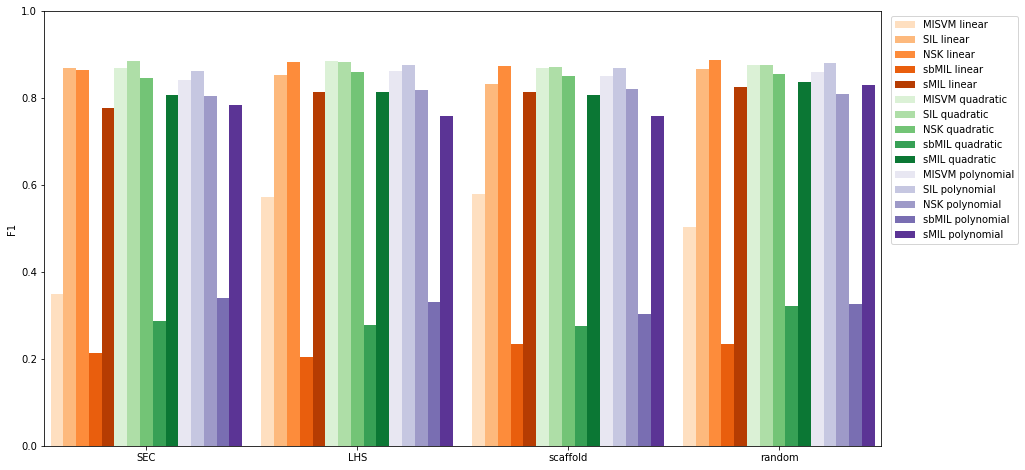

In [15]:
data_analysis.my_grouped_bar(macro_results,metric='F1')

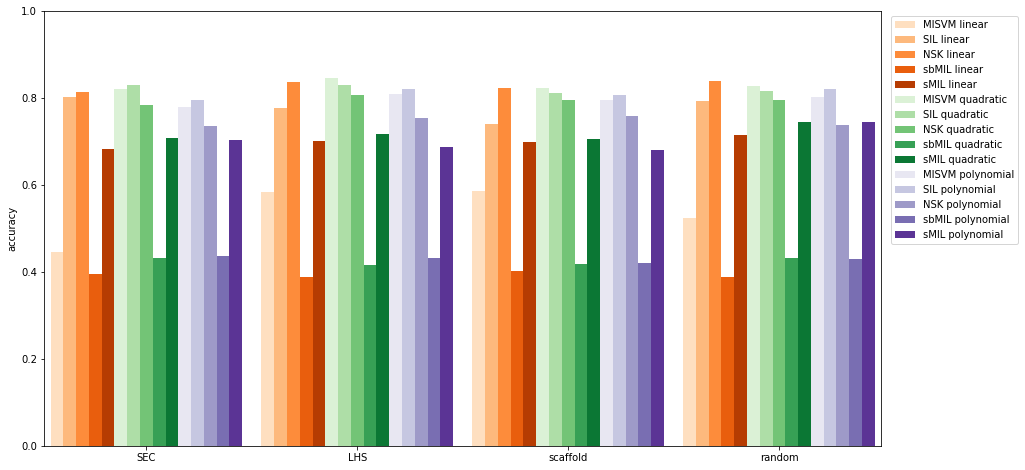

In [16]:
data_analysis.my_grouped_bar(micro_results,metric='accuracy')

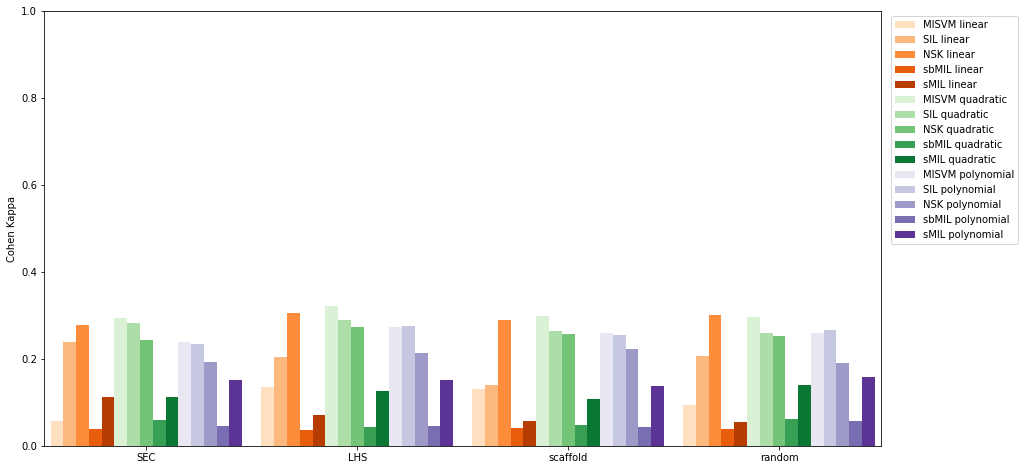

In [17]:
data_analysis.my_grouped_bar(micro_results,metric='Cohen Kappa')

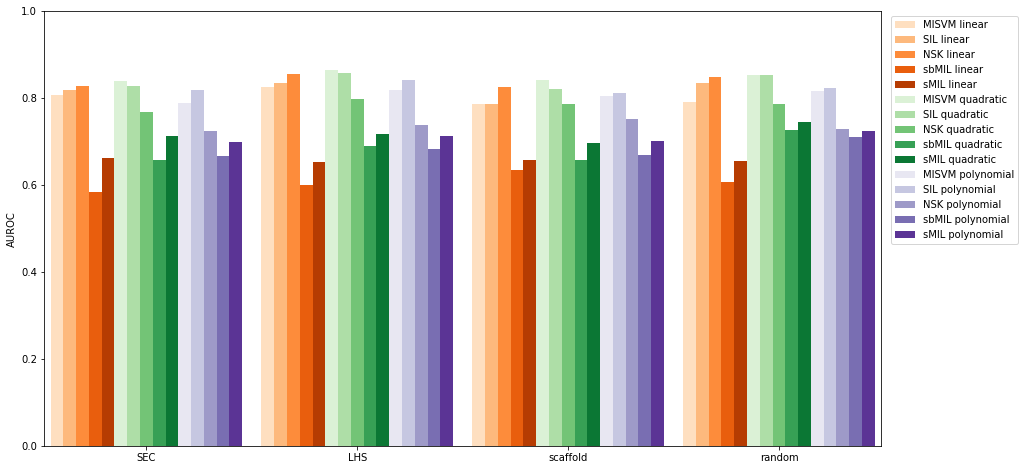

In [18]:
data_analysis.my_grouped_bar(micro_results,metric='AUROC')

Morgan

In [19]:
MORGAN_int_results_raw = {
    'SEC':      pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_SEC_MORGAN.pk1'),
    'LHS' :     pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_LSH_MORGAN.pk1'),
    'scaffold': pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_Scaffold_MORGAN.pk1'),
    'random':   pd.read_pickle('model_results/internal/MIL_aromatic_amine_cv_results_MORGAN.pk1'),
}
MORGAN_ext_results_raw = {
    'SEC':      pd.read_pickle('model_results\external\ext_val_results_SEC_stratified_MORGAN.pk1'),
    'LHS':      pd.read_pickle('model_results\external\ext_val_results_LSH_stratified_MORGAN.pk1'),
    'scaffold': pd.read_pickle('model_results\external\ext_val_results_scaffold_stratified_MORGAN.pk1'),
    'random':   pd.read_pickle('model_results\external\ext_val_results_MORGAN.pk1')
}
MORGAN_macro_results={}; MORGAN_micro_results={}; MORGAN_int_results={}; MORGAN_ext_results={}

for data in MORGAN_int_results_raw:
    MORGAN_int_results[data] = data_analysis.pickle_transform(MORGAN_int_results_raw[data])
    MORGAN_macro_results[data],MORGAN_micro_results[data] = data_analysis.macro_mirco_mean_stdv(MORGAN_int_results[data])
MORGAN_macro_results = data_analysis.get_AUROC(data_dict=MORGAN_int_results_raw, paste_dict=MORGAN_macro_results)
MORGAN_micro_results = data_analysis.get_AUROC(data_dict=MORGAN_int_results_raw, paste_dict=MORGAN_micro_results)

for data in MORGAN_ext_results_raw:
    MORGAN_ext_results_raw[data]['model'] = MORGAN_ext_results_raw[data]['model'].apply(lambda x:x.replace('total_data_',''))
    MORGAN_ext_results[data] = data_analysis.pickle_transform(MORGAN_ext_results_raw[data])
    MORGAN_ext_results[data] = data_analysis.ext_val_metrics(MORGAN_ext_results[data])
MORGAN_ext_results = data_analysis.get_AUROC(data_dict=MORGAN_ext_results_raw, paste_dict=MORGAN_ext_results)

SEC
LHS
scaffold
random
SEC
LHS
scaffold
random
SEC
LHS
scaffold
random


results info

In [20]:
MORGAN_micro_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.032219,0.004672,0.003665,0.343443,0.930233,0.336467,0.80158
1,Morgan,SIL_linear,0.840029,0.180210,0.706227,0.756284,0.746811,0.812977,0.83938
2,Morgan,NSK_linear,0.853406,0.257063,0.713154,0.794809,0.814760,0.740020,0.85461
3,Morgan,sbMIL-linear,0.075383,0.010259,0.007081,0.356557,0.897196,0.340276,0.58148
4,Morgan,sMIL_linear,0.778902,0.131328,0.568092,0.689617,0.741660,0.543659,0.67087
5,Morgan,MISVM_quadratic,0.865456,0.300977,0.730317,0.821858,0.871571,0.726475,0.87977
6,Morgan,SIL_quadratic,0.866454,0.258086,0.745681,0.805191,0.797861,0.833114,0.87483
7,Morgan,NSK_quadratic,0.847437,0.267754,0.695661,0.795082,0.841276,0.698480,0.82430
8,Morgan,sbMIL-quadratic,0.191801,0.028742,0.026725,0.396721,0.897260,0.353325,0.56785
9,Morgan,sMIL_quadratic,0.711809,0.164057,0.423708,0.663934,0.830963,0.497271,0.68288


In [21]:
MORGAN_micro_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.183166,0.032139,0.036608,0.398087,0.961089,0.355569,0.82407
1,Morgan,SIL_linear,0.844149,0.190136,0.713179,0.763115,0.751841,0.828678,0.85318
2,Morgan,NSK_linear,0.866167,0.283340,0.736541,0.814754,0.835491,0.762089,0.86754
3,Morgan,sbMIL-linear,0.094427,0.010870,0.004114,0.360656,0.847222,0.340728,0.55193
4,Morgan,sMIL_linear,0.756246,0.151491,0.509244,0.682787,0.775291,0.522064,0.68810
5,Morgan,MISVM_quadratic,0.871721,0.310632,0.742795,0.830328,0.878800,0.737887,0.88933
6,Morgan,SIL_quadratic,0.871909,0.264095,0.757454,0.811749,0.797890,0.868239,0.89153
7,Morgan,NSK_quadratic,0.866707,0.298498,0.733770,0.821585,0.863359,0.736053,0.83775
8,Morgan,sbMIL-quadratic,0.162825,0.022207,0.016770,0.384699,0.876000,0.348680,0.56213
9,Morgan,sMIL_quadratic,0.718095,0.180576,0.439661,0.676503,0.856818,0.509474,0.73225


In [22]:
MORGAN_micro_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.83466
1,Morgan,SIL_linear,0.846360,0.190933,0.718556,0.765301,0.750873,0.854617,0.86757
2,Morgan,NSK_linear,0.863655,0.288838,0.728913,0.815301,0.850278,0.738179,0.86842
3,Morgan,sbMIL-linear,0.090663,0.009611,0.001885,0.358743,0.829787,0.339869,0.56315
4,Morgan,sMIL_linear,0.772820,0.158391,0.545828,0.696721,0.771872,0.545305,0.68328
5,Morgan,MISVM_quadratic,0.881587,0.325340,0.762549,0.843443,0.889120,0.756542,0.89588
6,Morgan,SIL_quadratic,0.871415,0.274082,0.752664,0.815027,0.812035,0.825150,0.88381
7,Morgan,NSK_quadratic,0.863967,0.301314,0.726835,0.821038,0.875789,0.719844,0.83786
8,Morgan,sbMIL-quadratic,0.187199,0.033017,0.037908,0.399727,0.961977,0.356197,0.54994
9,Morgan,sMIL_quadratic,0.631441,0.146911,0.312408,0.616940,0.880499,0.460366,0.67313


In [23]:
MORGAN_micro_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,MISVM_linear,0.000000,0.000000,0.000000,0.331507,0.000000,0.331507,0.75059
1,Morgan,SIL_linear,0.824720,0.138376,0.681259,0.729589,0.727672,0.742919,0.82212
2,Morgan,NSK_linear,0.839746,0.241549,0.683817,0.778630,0.813605,0.691794,0.83039
3,Morgan,sbMIL-linear,0.053734,0.002975,-0.005696,0.343836,0.747253,0.333521,0.57752
4,Morgan,sMIL_linear,0.759458,0.115262,0.524494,0.669041,0.738575,0.500936,0.64666
5,Morgan,MISVM_quadratic,0.842459,0.273226,0.682849,0.794247,0.862914,0.673469,0.84823
6,Morgan,SIL_quadratic,0.851246,0.224125,0.718395,0.780822,0.779101,0.787921,0.85676
7,Morgan,NSK_quadratic,0.838563,0.260106,0.676363,0.785753,0.844842,0.671750,0.81326
8,Morgan,sbMIL-quadratic,0.193548,0.023044,0.013142,0.390411,0.836991,0.347643,0.56628
9,Morgan,sMIL_quadratic,0.652626,0.116342,0.314380,0.606849,0.797161,0.442573,0.64748


In [24]:
MORGAN_ext_results['SEC']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.897638,0.331241,0.798844,0.857143,0.863636,0.840000,0.84590
1,Morgan,TPOT,0.890625,0.316638,0.785990,0.846154,0.850746,0.833333,0.82869
2,Morgan,NSK_polynomial,0.859504,0.290436,0.718266,0.813187,0.866667,0.709677,0.81038


In [25]:
MORGAN_ext_results['LHS']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.790698,0.143189,0.592334,0.703297,0.750000,0.565217,0.72869
1,Morgan,TPOT,0.793103,0.216069,0.581689,0.736264,0.836364,0.583333,0.70219
2,Morgan,NSK_polynomial,0.758621,0.168747,0.511971,0.692308,0.800000,0.527778,0.68033


In [26]:
MORGAN_ext_results['scaffold']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.705882,0.075673,0.407662,0.615385,0.724138,0.424242,0.61284
1,Morgan,TPOT,0.738462,0.046600,0.493036,0.626374,0.695652,0.409091,0.50546
2,Morgan,NSK_polynomial,0.650407,-0.039129,0.302868,0.527473,0.645161,0.275862,0.50437


In [27]:
MORGAN_ext_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,Morgan,NSK_linear,0.928000,0.387866,0.857340,0.902174,0.906250,0.892857,0.88842
1,Morgan,TPOT,0.896000,0.338028,0.793935,0.858696,0.875000,0.821429,0.82919
2,Morgan,NSK_polynomial,0.903226,0.351693,0.807598,0.869565,0.888889,0.827586,0.86013


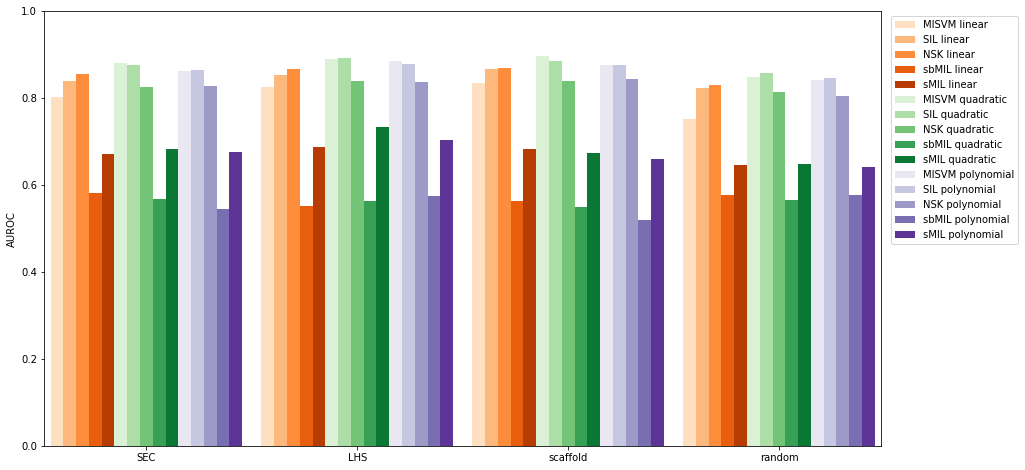

In [28]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='AUROC')

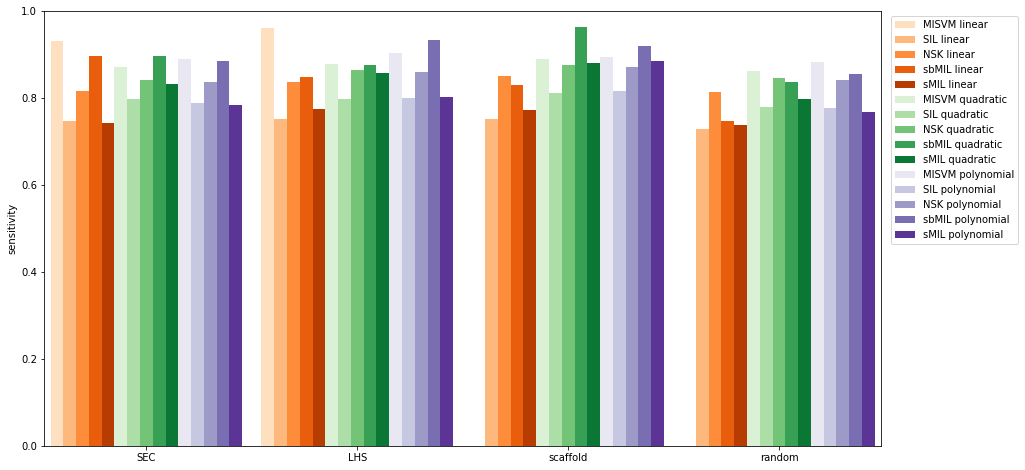

In [29]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='sensitivity')

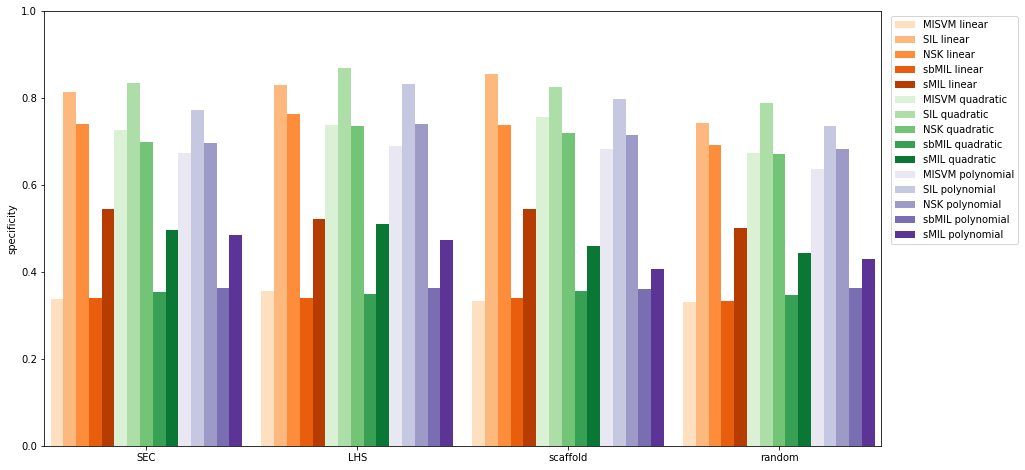

In [30]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='specificity')

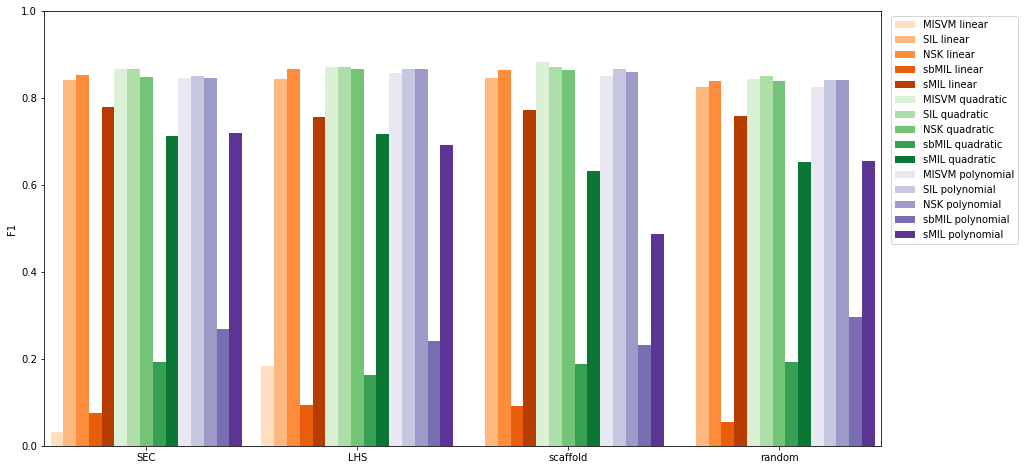

In [31]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='F1')

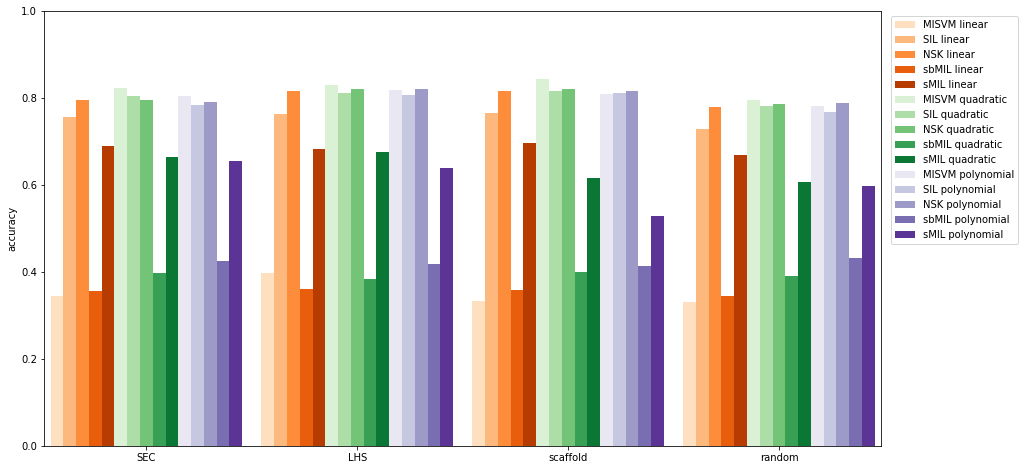

In [32]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='accuracy')

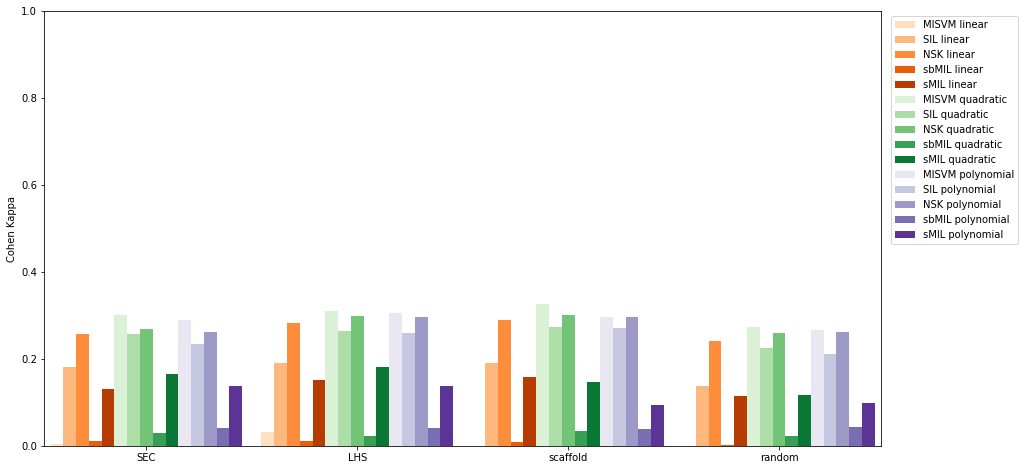

In [33]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='Cohen Kappa')

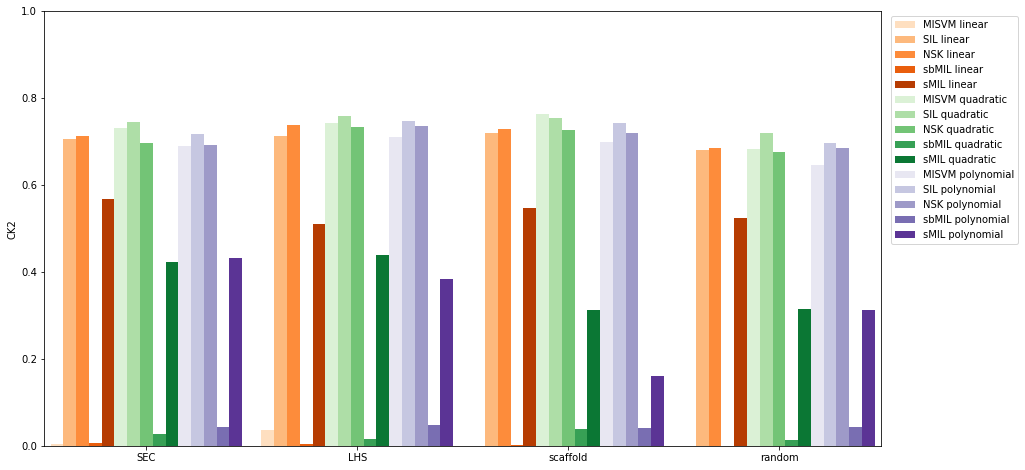

In [34]:
data_analysis.my_grouped_bar(MORGAN_micro_results,metric='CK2')

### External Validation

Bar chart

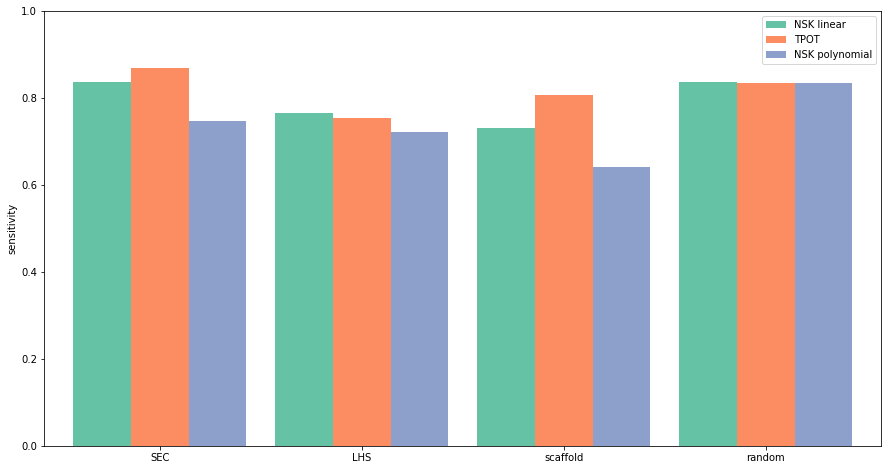

In [35]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='sensitivity')

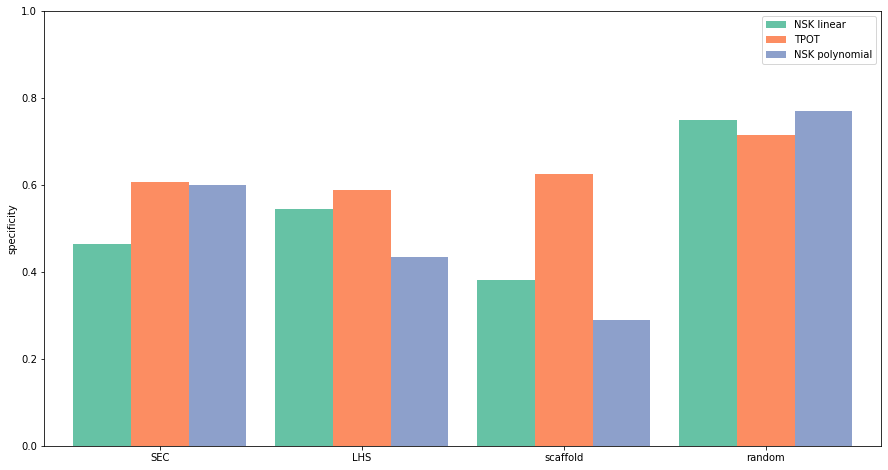

In [36]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='specificity')

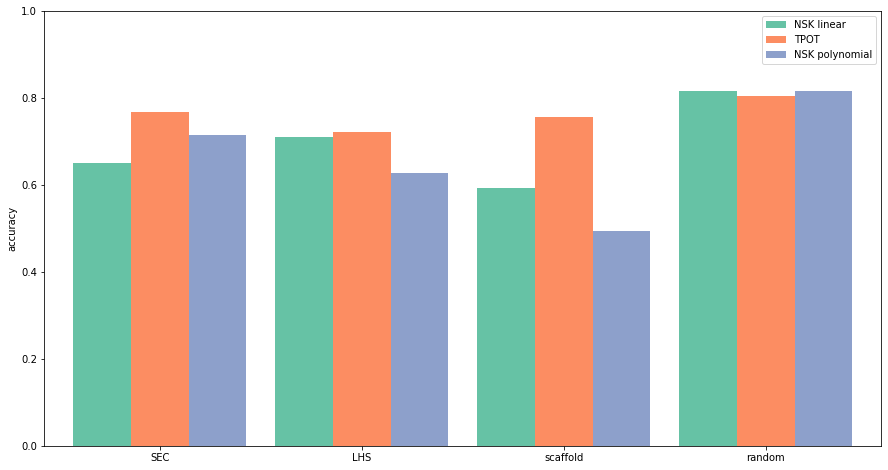

In [37]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='accuracy')

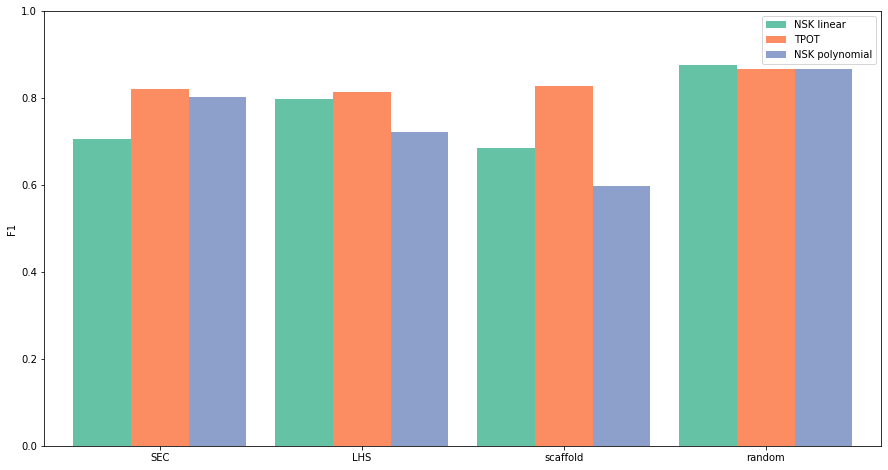

In [38]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='F1')

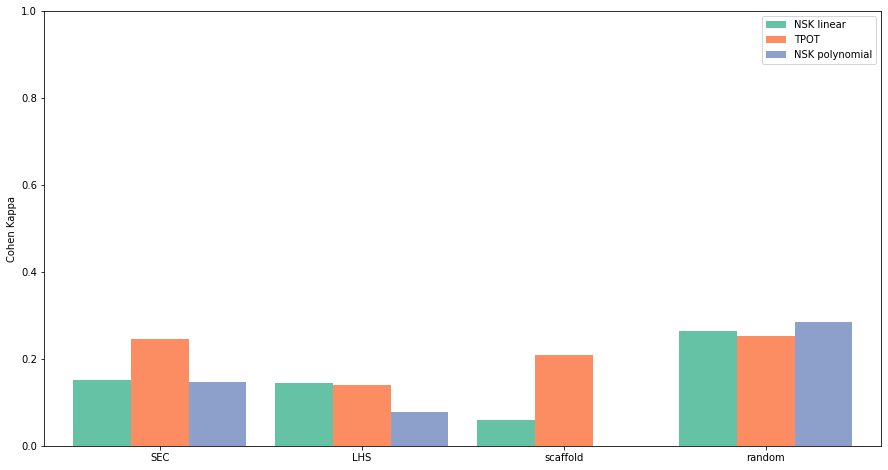

In [39]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='Cohen Kappa')

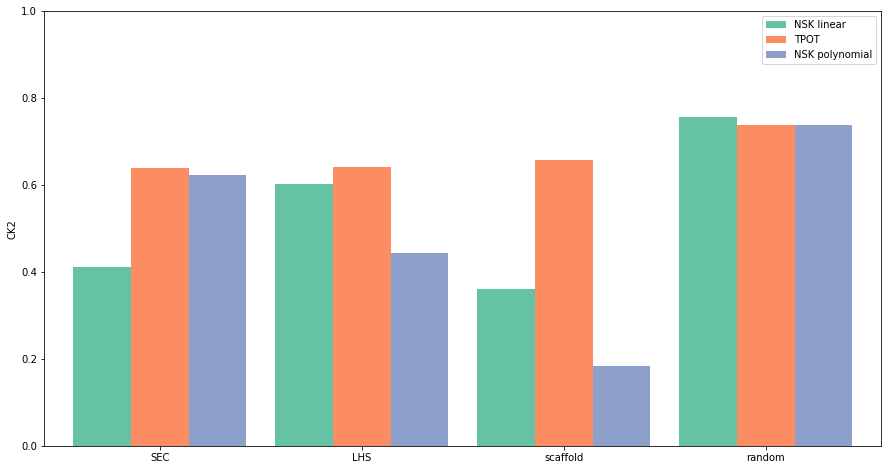

In [40]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='CK2')

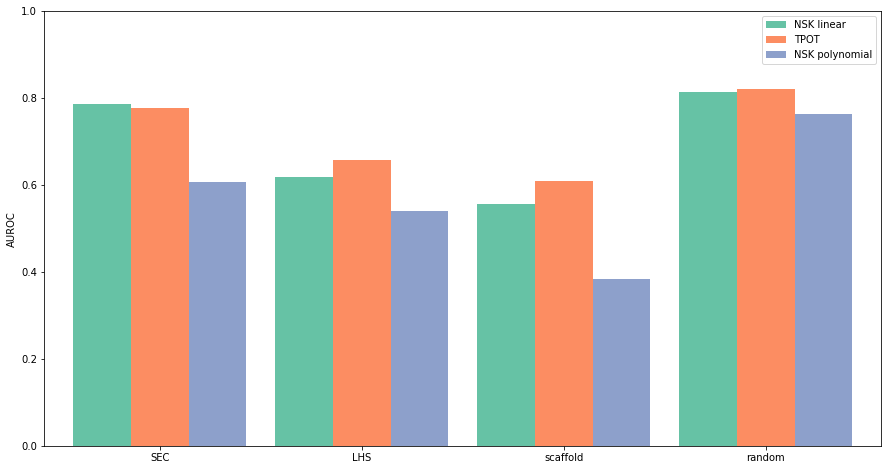

In [41]:
data_analysis.my_grouped_bar(ext_results,ext=True,metric='AUROC')

In [42]:
ext_results_raw['SEC']

,predicted,predicted labal,true label,fold,iteration,index,model,encoding
0,-0.854785,0,0,,,0,NSK_linear,MACCS
1,0.625161,1,0,,,1,NSK_linear,MACCS
2,0.237921,1,0,,,2,NSK_linear,MACCS
3,-1.543886,0,0,,,3,NSK_linear,MACCS
4,-1.264121,0,0,,,4,NSK_linear,MACCS
...,...,...,...,...,...,...,...,...
258,0.086748,1,1,,,86,NSK_polynomial,MACCS
259,1.896451,1,1,,,87,NSK_polynomial,MACCS
260,4.372681,1,1,,,88,NSK_polynomial,MACCS
261,1.936091,1,1,,,89,NSK_polynomial,MACCS


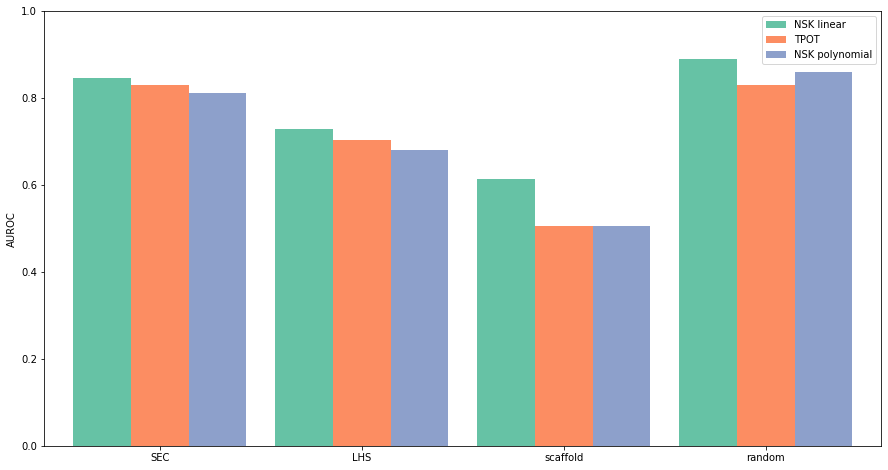

In [43]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='AUROC')

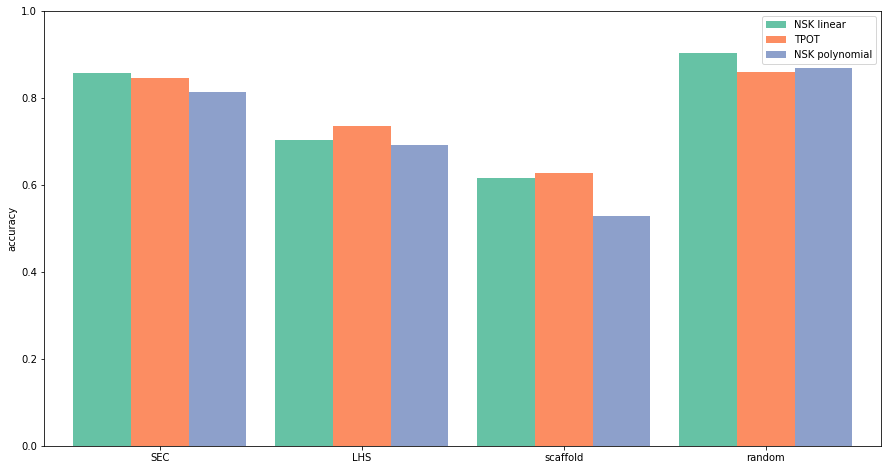

In [44]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='accuracy')

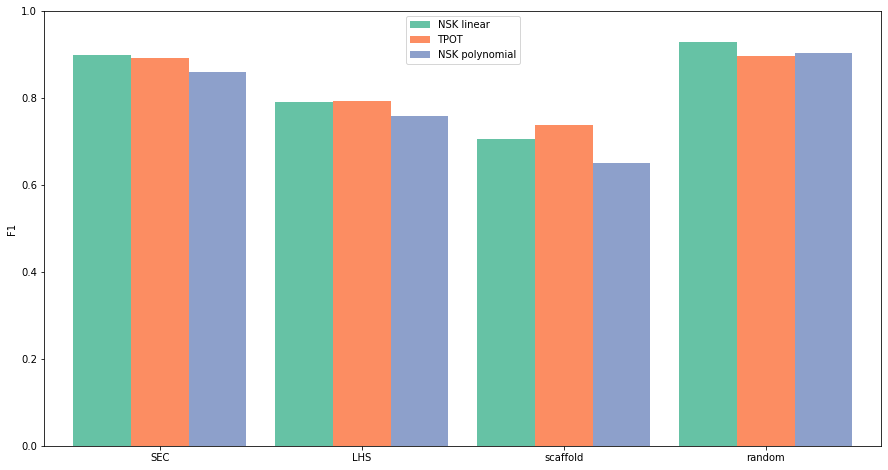

In [45]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='F1')

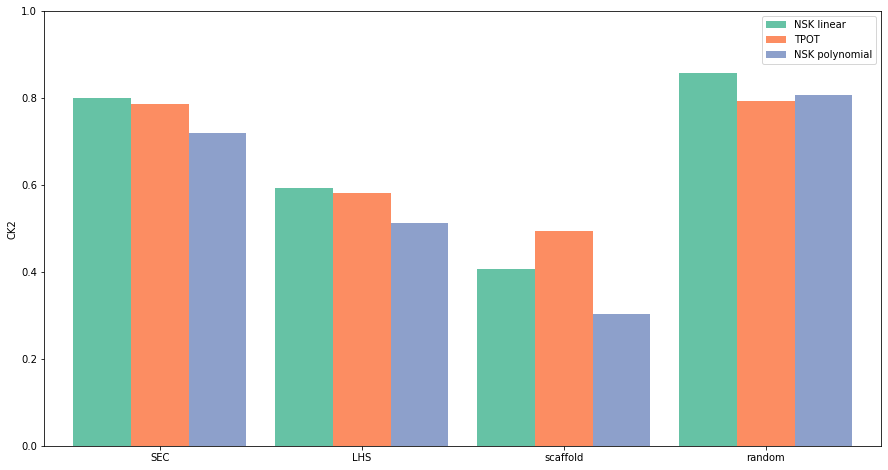

In [46]:
data_analysis.my_grouped_bar(MORGAN_ext_results,ext=True,metric='CK2')

Auroc

IndexError: list index out of range

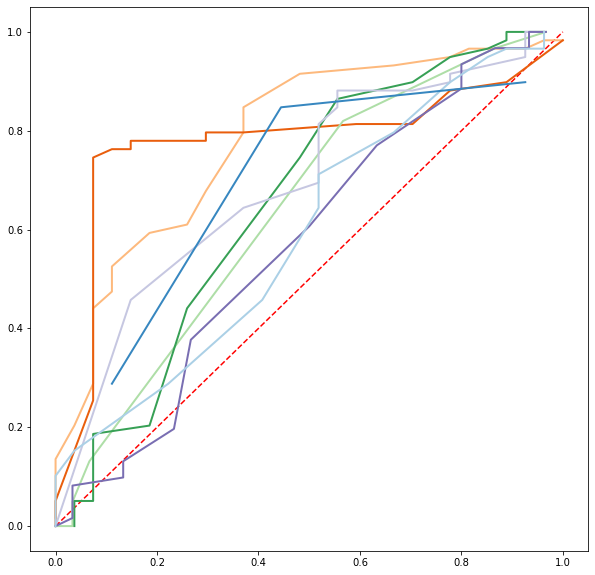

In [47]:
sens,spec = data_analysis.AUROC_analysis( data_dict = ext_results_raw, 
                num_step=25,line_thickness=2)

In [ ]:
sens

,NSK_linear_SEC,TPOT_SEC,NSK_linear_LHS,TPOT_LHS,NSK_linear_scaffold,TPOT_scaffold,TPOT_random,NSK_linear_random
0,0.983051,0.983051,1.000000,1.000000,1.000000,0.898305,1.000000,1.000000
1,0.983051,0.898305,1.000000,1.000000,1.000000,0.898305,1.000000,1.000000
2,0.983051,0.881356,1.000000,1.000000,0.983051,0.898305,1.000000,1.000000
3,0.966102,0.813559,1.000000,1.000000,0.983051,0.898305,1.000000,1.000000
4,0.966102,0.813559,0.983051,1.000000,0.983051,0.898305,0.967213,1.000000
5,0.966102,0.796610,0.966102,0.949153,0.966102,0.898305,0.967213,1.000000
6,0.966102,0.796610,0.949153,0.949153,0.966102,0.898305,0.967213,1.000000
7,0.949153,0.779661,0.898305,0.915254,0.949153,0.847458,0.967213,1.000000
8,0.932203,0.779661,0.864407,0.915254,0.898305,0.847458,0.934426,0.983607
9,0.915254,0.779661,0.745763,0.898305,0.796610,0.847458,0.918033,0.983607


In [ ]:
spec

,NSK_linear_SEC,TPOT_SEC,NSK_linear_LHS,TPOT_LHS,NSK_linear_scaffold,TPOT_scaffold,TPOT_random,NSK_linear_random
0,1.000000,1.000000,0.962963,0.962963,0.962963,0.925926,0.961538,0.961538
1,0.962963,0.888889,0.925926,0.925926,0.962963,0.925926,0.923077,0.961538
2,0.962963,0.777778,0.925926,0.925926,0.962963,0.925926,0.846154,0.961538
3,0.925926,0.703704,0.888889,0.925926,0.962963,0.925926,0.769231,0.961538
4,0.888889,0.592593,0.888889,0.925926,0.962963,0.925926,0.615385,0.961538
5,0.851852,0.370370,0.851852,0.925926,0.962963,0.925926,0.538462,0.961538
6,0.814815,0.296296,0.777778,0.925926,0.888889,0.925926,0.538462,0.923077
7,0.777778,0.296296,0.703704,0.777778,0.851852,0.444444,0.500000,0.884615
8,0.666667,0.259259,0.555556,0.777778,0.777778,0.444444,0.461538,0.807692
9,0.481481,0.259259,0.481481,0.777778,0.666667,0.444444,0.461538,0.576923


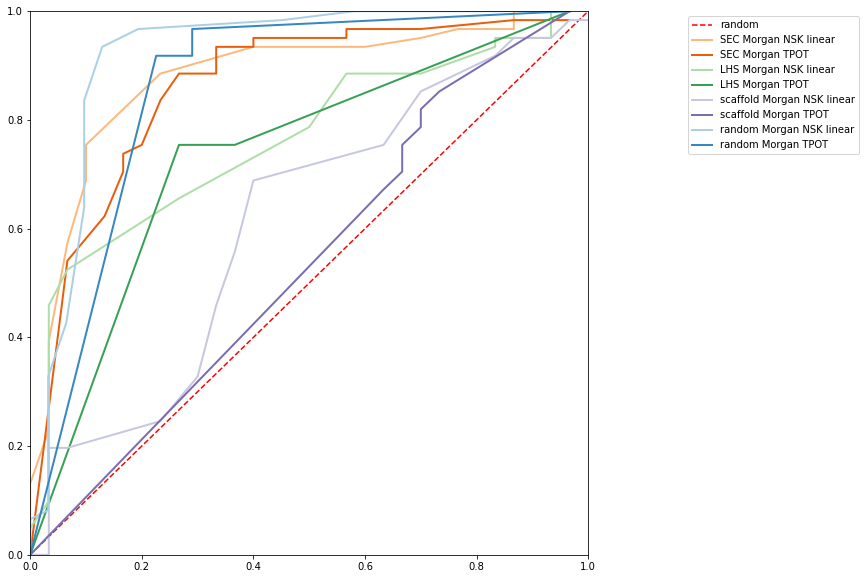

In [ ]:
sens,spec = data_analysis.AUROC_analysis( data_dict = MORGAN_ext_results_raw, 
                num_step=25,line_thickness=2)

In [ ]:
sens

,NSK_linear_SEC,TPOT_SEC,NSK_linear_LHS,TPOT_LHS,NSK_linear_scaffold,TPOT_scaffold,NSK_linear_random,TPOT_random
0,1.000000,0.983607,1.000000,1.000000,0.983607,1.000000,1.000000,1.000000
1,1.000000,0.983607,1.000000,0.754098,0.983607,0.852459,1.000000,0.967213
2,1.000000,0.967213,1.000000,0.754098,0.983607,0.819672,1.000000,0.967213
3,1.000000,0.967213,1.000000,0.754098,0.983607,0.819672,1.000000,0.967213
4,1.000000,0.967213,1.000000,0.754098,0.983607,0.803279,1.000000,0.967213
5,1.000000,0.950820,1.000000,0.754098,0.950820,0.803279,1.000000,0.967213
6,1.000000,0.950820,0.983607,0.754098,0.950820,0.786885,1.000000,0.967213
7,0.983607,0.950820,0.950820,0.754098,0.918033,0.786885,1.000000,0.967213
8,0.967213,0.950820,0.950820,0.754098,0.852459,0.786885,1.000000,0.950820
9,0.967213,0.950820,0.934426,0.754098,0.754098,0.786885,1.000000,0.950820


In [ ]:
spec

,NSK_linear_SEC,TPOT_SEC,NSK_linear_LHS,TPOT_LHS,NSK_linear_scaffold,TPOT_scaffold,NSK_linear_random,TPOT_random
0,0.966667,0.966667,0.966667,0.966667,1.000000,0.966667,0.967742,0.967742
1,0.966667,0.866667,0.966667,0.366667,1.000000,0.733333,0.967742,0.290323
2,0.966667,0.700000,0.966667,0.366667,1.000000,0.700000,0.903226,0.290323
3,0.966667,0.633333,0.966667,0.366667,0.966667,0.700000,0.903226,0.290323
4,0.966667,0.566667,0.966667,0.366667,0.966667,0.700000,0.870968,0.290323
5,0.866667,0.566667,0.933333,0.366667,0.933333,0.700000,0.870968,0.290323
6,0.866667,0.533333,0.933333,0.300000,0.866667,0.700000,0.774194,0.290323
7,0.866667,0.500000,0.933333,0.300000,0.833333,0.700000,0.677419,0.290323
8,0.866667,0.466667,0.833333,0.300000,0.700000,0.700000,0.645161,0.290323
9,0.766667,0.400000,0.833333,0.300000,0.633333,0.700000,0.580645,0.290323


# Hansen Data analysis

In [ ]:
hansen_raw = {
    'random':   pd.read_pickle('model_results/hansen/rscv_random_hansen_results.pk1')
}
hansen_macro_results={}; hansen_micro_results={}; hansen_results={}

for data in hansen_raw:
    hansen_results[data] = data_analysis.pickle_transform(hansen_raw[data])
    hansen_macro_results[data],hansen_micro_results[data] = data_analysis.macro_mirco_mean_stdv(hansen_results[data])
hansen_macro_results = data_analysis.get_AUROC(data_dict=hansen_raw, paste_dict=hansen_macro_results)
hansen_micro_results = data_analysis.get_AUROC(data_dict=hansen_raw, paste_dict=hansen_micro_results)

MACCS NSK linear is missing data
Morgan NSK linear is missing data
MACCS NSK polynomial is missing data
Morgan NSK polynomial is missing data
random
random


Bar Chart

In [ ]:
hansen_macro_results['random']

,encoding,model,F1,F1_stdv,Cohen Kappa,Cohen Kappa_stdv,accuracy,accuracy_stdv,sensitivity,sensitivity_stdv,specificity,specificity_stdv,AUROC
0,MACCS,NSK linear,0.725704,0.021995,0.218448,0.021098,0.718061,0.021255,0.760309,0.021422,0.677784,0.023181,0.77654
1,Morgan,NSK linear,0.764906,0.012072,0.260016,0.011171,0.759385,0.011309,0.809631,0.012414,0.712612,0.013234,0.80651
2,MACCS,NSK polynomial,0.771323,0.028916,0.258187,0.029186,0.758816,0.029281,0.785967,0.027340,0.730054,0.032692,0.77108
3,Morgan,NSK polynomial,0.793869,0.013773,0.277599,0.013793,0.778785,0.013843,0.798872,0.012483,0.756127,0.017686,0.81922


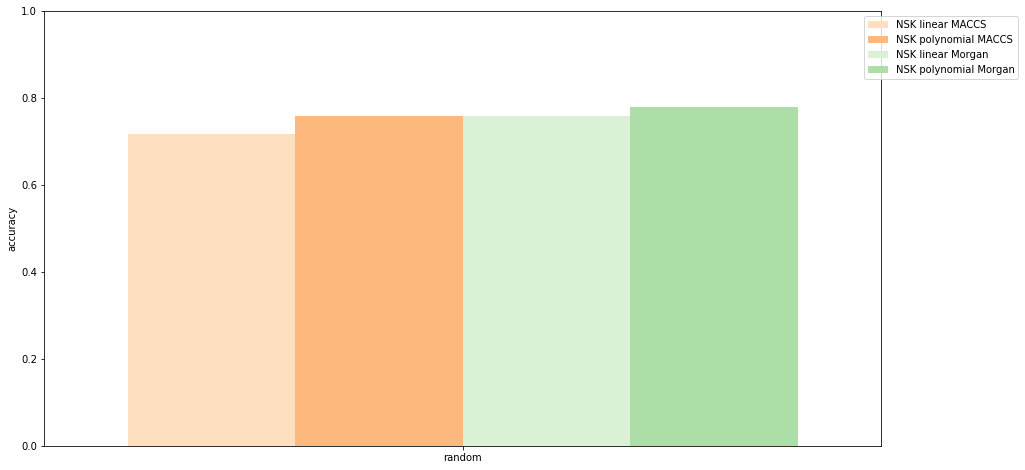

In [ ]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='accuracy',grouping_size=2)

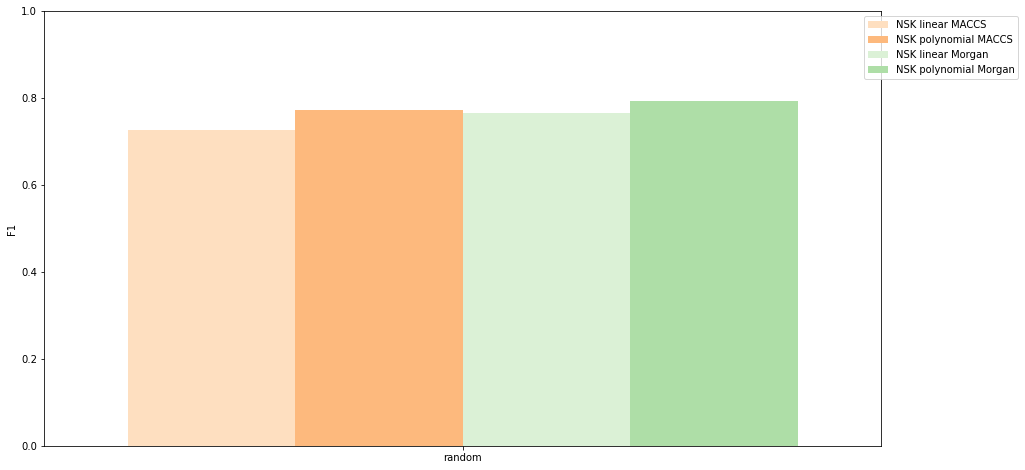

In [ ]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='F1',grouping_size=2)

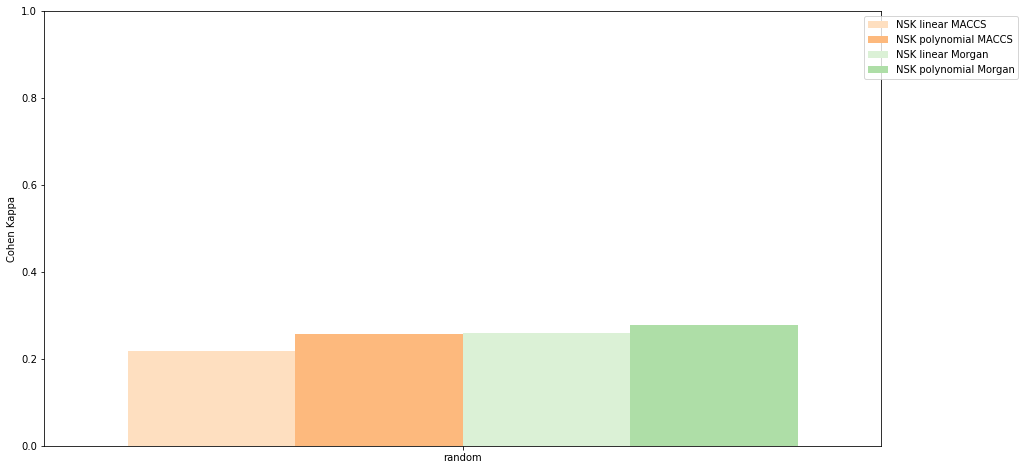

In [ ]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='Cohen Kappa',grouping_size=2)

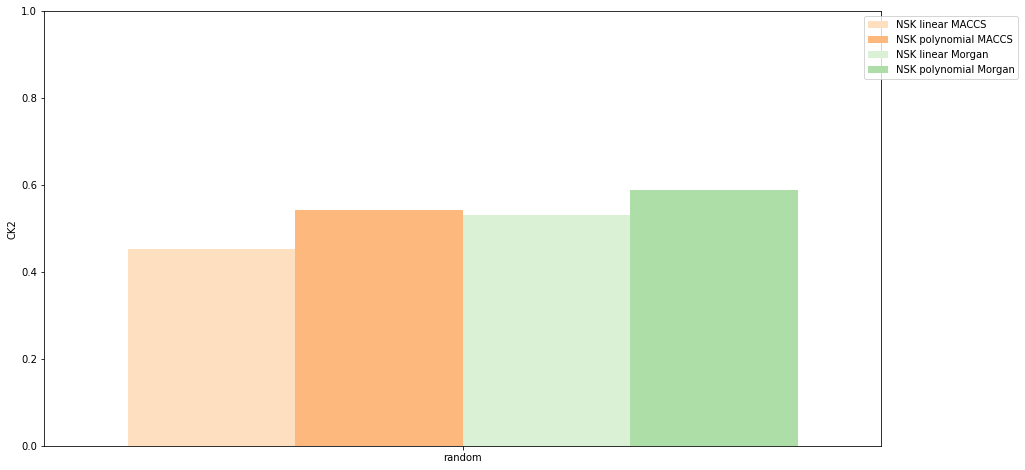

In [ ]:
data_analysis.my_grouped_bar(hansen_micro_results,metric='CK2',grouping_size=2)

In [ ]:
hansen_micro_results['random']

,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity,AUROC
0,MACCS,NSK linear,0.725859,0.218442,0.452164,0.718063,0.760175,0.677439,0.77654
1,Morgan,NSK linear,0.764976,0.260012,0.530791,0.759387,0.809508,0.712424,0.80651
2,MACCS,NSK polynomial,0.771449,0.258152,0.542596,0.758801,0.785990,0.729592,0.77108
3,Morgan,NSK polynomial,0.793938,0.277593,0.587706,0.778786,0.798827,0.755869,0.81922


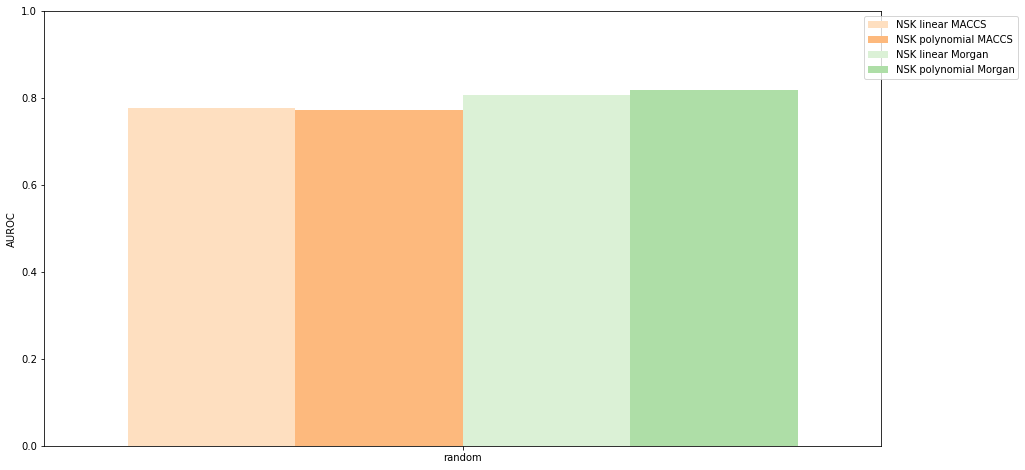

In [ ]:
data_analysis.my_grouped_bar(hansen_macro_results,metric='AUROC',grouping_size=2)

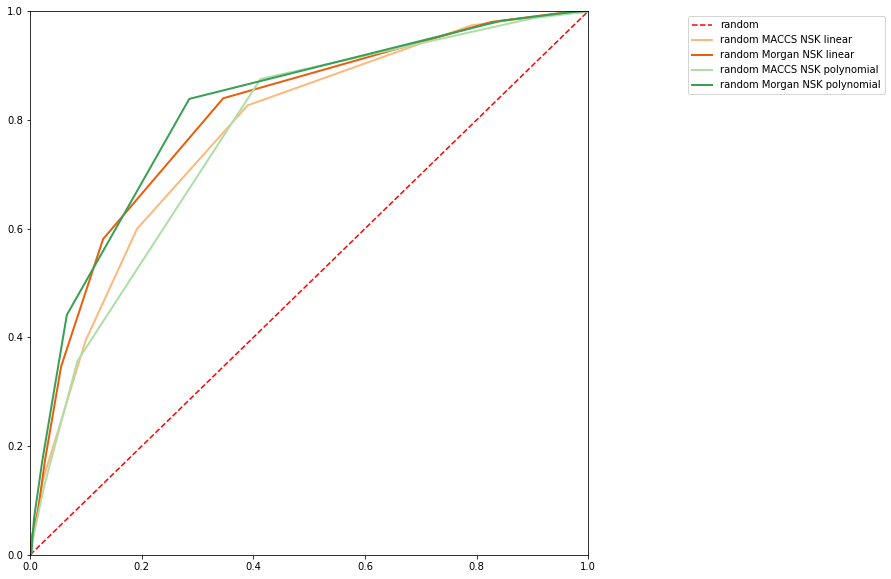

(    NSK linear_random  NSK polynomial_random
 0            1.000000               1.000000
 1            1.000000               1.000000
 2            1.000000               1.000000
 3            1.000000               1.000000
 4            1.000000               1.000000
 5            1.000000               1.000000
 6            0.999710               1.000000
 7            0.997683               1.000000
 8            0.995944               0.999131
 9            0.980301               0.996524
 10           0.839803               0.982039
 11           0.580823               0.838644
 12           0.346466               0.441194
 13           0.176130               0.173523
 14           0.080243               0.069235
 15           0.037080               0.029548
 16           0.017092               0.015353
 17           0.007242               0.007532
 18           0.002317               0.003187
 19           0.000869               0.002028
 20           0.000579            

In [ ]:
data_analysis.AUROC_analysis( data_dict = hansen_raw, 
                num_step=25,line_thickness=2)

# Molecule group analysis

In [ ]:
hansen_results_labeled = molecule_analysis.label_data(hansen_raw,pd.read_pickle("data\encoded\encoded_data_hansen.pk1"))['random']

In [ ]:
raw = hansen_raw['random']
favourite_model_morgan = raw[(raw['encoding']=='Morgan') & (raw['model']=='NSK polynomial')].reset_index(drop=True)
favourite_model_morgan = molecule_analysis.label_data(favourite_model_morgan,pd.read_pickle("data\encoded\encoded_data_hansen.pk1"))

In [ ]:
raw = hansen_raw['random']
favourite_model = raw[(raw['encoding']=='MACCS') & (raw['model']=='NSK polynomial')].reset_index(drop=True)
favourite_model = molecule_analysis.label_data(favourite_model,pd.read_pickle("data\encoded\encoded_data_hansen.pk1"))

phenol aniline benzamide

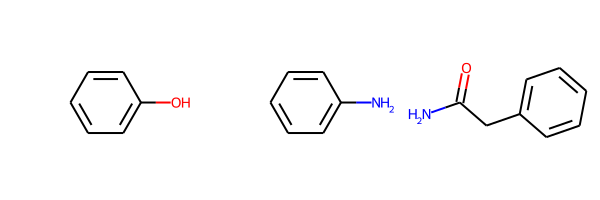

In [ ]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles('Oc1ccccc1'),Chem.MolFromSmiles('Nc1ccccc1'),Chem.MolFromSmiles('NC(=O)Cc1ccccc1')])

In [ ]:
PAB = molecule_analysis.molecule_group_analysis(data=favourite_model, function=molecule_analysis.phenol_aniline_benzamide_check)
if type(PAB) == pd.core.frame.DataFrame:
    PAB = data_analysis.ext_val_metrics(data_analysis.pickle_transform(PAB))
else:
    PAB = ''
PAB

Number of group: 45.0
Ames +: 191         Ames -: 259         Total: 450         Ames + (%): 42.444


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.673575,0.214243,0.346247,0.72,0.666667,0.760784


In [ ]:
PAB = molecule_analysis.molecule_group_analysis(data=favourite_model_morgan, function=molecule_analysis.phenol_aniline_benzamide_check)
if type(PAB) == pd.core.frame.DataFrame:
    PAB = data_analysis.ext_val_metrics(data_analysis.pickle_transform(PAB))
else:
    PAB = ''
PAB

Number of group: 43.9
Ames +: 251         Ames -: 188         Total: 439         Ames + (%): 57.175


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.796715,0.272028,0.592486,0.774487,0.822034,0.719212


four benzyl piperidines

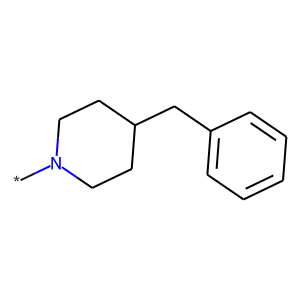

In [ ]:
Chem.Draw.MolToImage(Chem.MolFromSmiles('*N2CCC(Cc1ccccc1)CC2'))

In [ ]:
fBP = molecule_analysis.molecule_group_analysis(data=favourite_model, function=molecule_analysis.four_benzyl_piperidines_check)
if type(fBP) == pd.core.frame.DataFrame:
    fBP = data_analysis.ext_val_metrics(data_analysis.pickle_transform(fBP))
else:
    fBP = ''
fBP

Molecule group not found


''

Azides

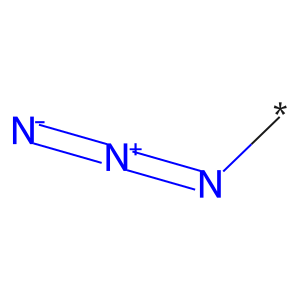

In [ ]:
Chem.Draw.MolToImage(Chem.MolFromSmiles('[N-]=[N+]=N*'))

In [ ]:
azides = molecule_analysis.molecule_group_analysis(data=favourite_model, function=molecule_analysis.azide_check)
if type(azides) == pd.core.frame.DataFrame:
    azides = data_analysis.ext_val_metrics(data_analysis.pickle_transform(azides))
else:
    azides = ''
azides

Number of group: 6.3
Ames +: 61          Ames -: 2           Total: 63           Ames + (%): 96.825


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.923077,-0.025974,0.840864,0.857143,0.964286,0.0


polyaromatics

In [ ]:
polyaromatics = molecule_analysis.molecule_group_analysis(data=favourite_model, function=molecule_analysis.polyaromatic_check)
if type(polyaromatics) == pd.core.frame.DataFrame:
    polyaromatics = data_analysis.ext_val_metrics(data_analysis.pickle_transform(polyaromatics))
else:
    polyaromatics = ''
polyaromatics

Number of group: 96.6
Ames +: 825         Ames -: 141         Total: 966         Ames + (%): 85.404


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,MACCS,NSK polynomial,0.882462,0.130619,0.762525,0.802277,0.89625,0.349398


In [ ]:
polyaromatics = molecule_analysis.molecule_group_analysis(data=favourite_model_morgan, function=molecule_analysis.polyaromatic_check)
if type(polyaromatics) == pd.core.frame.DataFrame:
    polyaromatics = data_analysis.ext_val_metrics(data_analysis.pickle_transform(polyaromatics))
else:
    polyaromatics = ''
polyaromatics

Number of group: 94.9
Ames +: 509         Ames -: 440         Total: 949         Ames + (%): 53.635


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.780059,0.261465,0.560296,0.762908,0.776265,0.747126


In [ ]:
a = molecule_analysis.molecule_group_analysis(data=favourite_model_morgan, function=molecule_analysis.polyaromatic_check)
b = molecule_analysis.molecule_group_analysis(data=favourite_model, function=molecule_analysis.polyaromatic_check)

Number of group: 94.9
Ames +: 509         Ames -: 440         Total: 949         Ames + (%): 53.635
Number of group: 96.6
Ames +: 825         Ames -: 141         Total: 966         Ames + (%): 85.404


Alkyl/Alkenyl halides

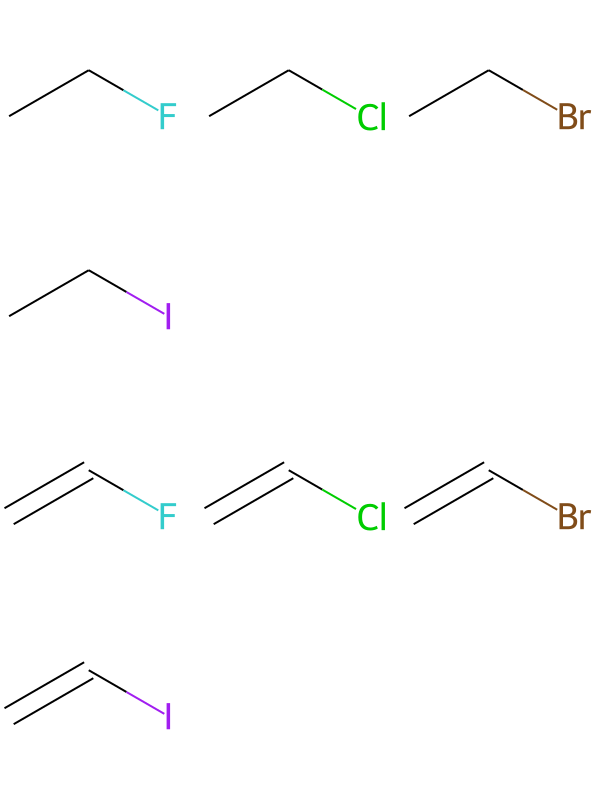

In [ ]:
alkyl_options = ['CCF','CCCl','CCBr','CCI','CCAt','CCTs']
alkenyl_options = ['C=CF','C=CCl','C=CBr','C=CI','C=CAt','C=CTs']
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in alkyl_options+alkenyl_options])

In [ ]:
alkyl_alkenyl_halide = molecule_analysis.molecule_group_analysis(data=favourite_model_morgan, function=molecule_analysis.alkyl_alkenyl_halide_check)
if type(alkyl_alkenyl_halide) == pd.core.frame.DataFrame:
    alkyl_alkenyl_halide = data_analysis.ext_val_metrics(data_analysis.pickle_transform(alkyl_alkenyl_halide))
else:
    alkyl_alkenyl_halide = ''
alkyl_alkenyl_halide

Number of group: 10.0
Ames +: 60          Ames -: 40          Total: 100          Ames + (%): 60.0


,encoding,model,F1,Cohen Kappa,CK2,accuracy,sensitivity,specificity
0,Morgan,NSK polynomial,0.892562,0.364017,0.785514,0.87,0.885246,0.846154


In [ ]:
sum(a['true label'])

509

In [ ]:
sum(b['true label'])

825

In [ ]:
sum(favourite_model_morgan['true label'])

3452

In [ ]:
sum(favourite_model['true label'])

3496